In [ ]:
!pip install matplotlib Pillow

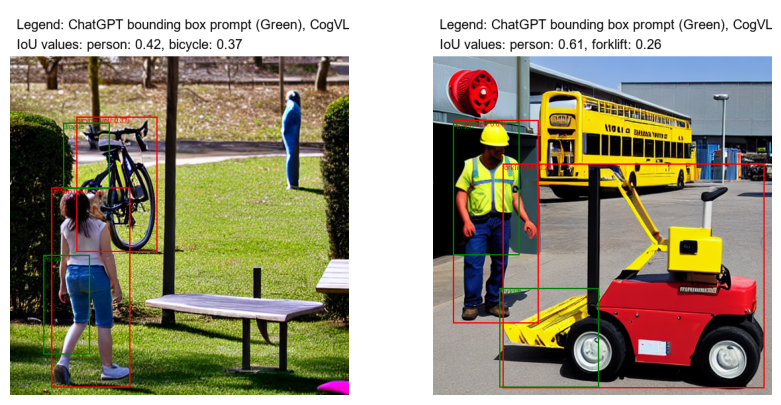

In [14]:
import json
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


# Load the filtered IoU results
with open('src/lib/llm_submodule/cogvlm/cogvlm_data/filtered_iou_results.json', 'r') as file:
    filtered_iou_results = json.load(file)

# Directory containing the images
image_dir = 'src/lib/llm_submodule/chatgpt/chatgpt_output/2024-05-19_10-12/gc7.5-seed0-alpha0.8'

# Function to parse bounding box from string
def parse_bbox(bbox_str):
    label, coords = bbox_str.split('[')
    coords = coords.strip(']').split(',')
    coords = [int(coord.strip()) for coord in coords]
    return label.strip(), coords

# Initialize plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Process only images 0 and 30
for index, i in enumerate([0, 30]):
    image_path = os.path.join(image_dir, f'{i}.png')
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)

    # Collect IoU values for the header
    iou_values = []

    # Draw bounding boxes for the current image
    for result in filtered_iou_results:
        if result['description_id'] == i:
            pred_label, pred_box = parse_bbox(result['pred_box'])
            gt_label, gt_box = parse_bbox(result['gt_box'])

            # Draw predicted bounding box in red
            draw.rectangle(pred_box, outline='red', width=2)
            draw.text((pred_box[0], pred_box[1]), f"{pred_label} (IoU: {result['iou']:.2f})", fill='red')

            # Draw ground truth bounding box in green
            draw.rectangle(gt_box, outline='green', width=2)
            draw.text((gt_box[0], gt_box[1]), gt_label, fill='green')

            # Add IoU value to the list
            iou_values.append(f"{pred_label}: {result['iou']:.2f}")

    # Add header with legend and IoU values
    header_height = 70  # Increased height to accommodate IoU values
    new_image = Image.new('RGB', (image.width, image.height + header_height), (255, 255, 255))
    new_image.paste(image, (0, header_height))
    draw = ImageDraw.Draw(new_image)
    
    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        font = ImageFont.load_default()

    # Add text to the header
    legend_text = "Legend: ChatGPT bounding box prompt (Green), CogVLM bounding box output (Red)"
    iou_text = "IoU values: " + ", ".join(iou_values)
    draw.text((10, 10), legend_text, fill='black', font=font)
    draw.text((10, 40), iou_text, fill='black', font=font)

    # Plot the image
    axs[index].imshow(new_image)
    axs[index].axis('off')  # Hide axes

plt.show()